# **Infinite Impulse Response (IIR)**
An Infinite Impulse Response (IIR) filter is a type of digital filter where the output signal depends not only on the input signal but also on the filter's previous output values. This means that an IIR filter has feedback, and the output signal can oscillate or ring due to the feedback. IIR filters are characterized by their transfer function, which is a ratio of polynomials of the filter's input and output signals.

IIR filters are used in a variety of signal processing applications, including audio and image processing, biomedical signal processing, and control systems. Compared to Finite Impulse Response (FIR) filters, IIR filters typically have a lower computational cost and can achieve sharper cutoff frequencies.

There are several methods for designing IIR filters, including **Butterworth**, Chebyshev, and elliptic filter designs. These designs differ in their passband ripple, stopband attenuation, and transition band characteristics. The choice of filter design depends on the specific application requirements.

# Filter performance parameters
Passband ripple, stopband attenuation, and transition band characteristics are important parameters that define the performance of a filter. These parameters are typically specified in the filter design process to meet specific requirements for a given application. Here is a brief overview of these characteristics:

**Passband ripple** refers to the amount of variation in gain that is allowed in the passband of the filter. For example, a low-pass filter with a passband ripple of 1 dB would allow the gain to vary by up to 1 dB across the passband. Passband ripple is typically specified as a maximum value in decibels (dB).

**Stopband attenuation** refers to the amount of attenuation (reduction in gain) that is required in the stopband of the filter. For example, a low-pass filter with a stopband attenuation of 60 dB would reduce the gain by at least 60 dB in the stopband. Stopband attenuation is typically specified as a minimum value in decibels (dB).

**Transition band** refers to the frequency range between the passband and stopband of the filter. In this region, the gain of the filter changes from the passband to the stopband. The width of the transition band is typically specified as the frequency range over which the gain changes from the passband ripple to the stopband attenuation. The steepness of the transition is also an important characteristic and is typically specified as the rate of attenuation per octave or per decade.

These characteristics are interrelated, and changing one can affect the others. For example, increasing the passband ripple can allow for a steeper roll-off in the stopband, but may also increase the width of the transition band. The choice of filter type and design parameters depends on the specific requirements of the application.

# IIR filter design methods
Butterworth, Chebyshev, and elliptic filters are all types of IIR filters, which means they have feedback loops in their design. These filters have different characteristics and are useful for different applications.

**Butterworth filters** are designed to have a maximally flat frequency response in the passband. This means that the gain in the passband is as uniform as possible. The trade-off for this flatness is a slower roll-off (i.e., less steep attenuation in the stopband). Butterworth filters are often used in applications where a flat response is desired, such as in audio applications.

**Chebyshev filters** are designed to have a steeper roll-off in the stopband than Butterworth filters. This means that they can achieve a higher level of attenuation in the stopband for a given order of filter. The trade-off for this steeper roll-off is some ripple (i.e., variation) in the passband. Chebyshev filters can be designed as Type I or Type II, with Type I filters having ripple only in the passband and Type II filters having ripple only in the stopband.

**Elliptic filters** are designed to have the steepest possible roll-off in the transition region between the passband and stopband, for a given order of filter. This means that they can achieve a high level of attenuation in the stopband with minimal ripple in the passband. However, they also have ripple in both the passband and stopband, which can make them more difficult to design and tune.

In summary, Butterworth filters are often used when a flat response is desired, Chebyshev filters are useful when a steeper roll-off is needed, and elliptic filters are used when a very steep roll-off is required with minimal ripple. The choice of filter type depends on the specific requirements of the application.

# **Low Pass Butterworth IIR filter**

In this example, we first specify the filter parameters, including the sample rate `fs`, the cutoff frequency `cutoff`, and the filter order `order`. We then use the `butter` function to compute the filter coefficients `b` and `a` using the **Butterworth** filter design method. Finally, we use the `freqz` function to compute the frequency response of the filter, and plot the response using the matplotlib library. 

Note that we also use the `filtfilt` function to apply the filter to a signal in order to remove phase distortion, as IIR filters can introduce phase shifts in the filtered signal.

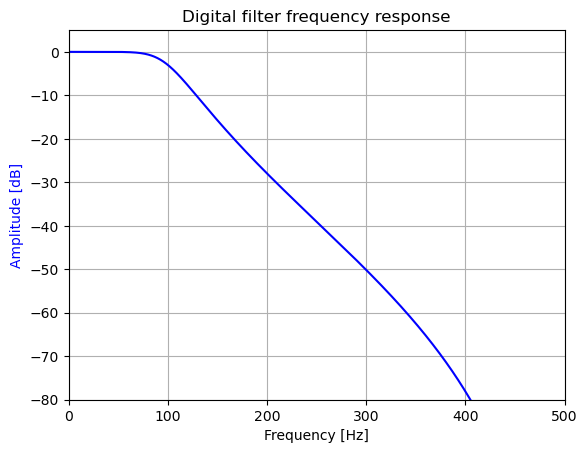

In [33]:
import numpy as np
from scipy.signal import butter, freqz, filtfilt
import matplotlib.pyplot as plt

# Filter specifications
fs = 1000 # Sample rate, Hz
cutoff = 100 # Cutoff frequency, Hz
order = 4 # Filter order

# Compute the filter coefficients using the Butterworth filter design function
b, a = butter(order, cutoff/(0.5*fs), btype='low')

# Compute the frequency response of the filter
w, h = freqz(b, a, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-80, 5])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


In [34]:
b

array([0.00482434, 0.01929737, 0.02894606, 0.01929737, 0.00482434])

In [35]:
a

array([ 1.        , -2.36951301,  2.31398841, -1.05466541,  0.18737949])

`from scipy.signal import butter, freqz, filtfilt`

This code imports the necessary functions from the scipy.signal module to design and analyze IIR filters. Specifically, it imports the butter function for designing Butterworth filters, the freqz function for computing the frequency response of a filter, and the filtfilt function for applying a filter to a signal using forward and backward filtering to eliminate phase distortion. These functions can be used together to design and analyze IIR filters for a variety of applications.


```
# Filter specifications
fs = 1000 # Sample rate, Hz
cutoff = 100 # Cutoff frequency, Hz
order = 4 # Filter order
```
Here, the filter specifications are defined for the IIR filter design. fs is the sample rate in Hz, cutoff is the desired cutoff frequency in Hz, and order is the order of the filter. The order determines the steepness of the filter's rolloff, with higher orders resulting in steeper rolloffs but also greater phase distortion in the filter's passband. In this case, an order of 4 is chosen, which is a good tradeoff between steepness and phase distortion for many applications.



```
# Compute the filter coefficients using the Butterworth filter design function
b, a = butter(order, cutoff/(0.5*fs), btype='low')
```
Here, the butter function is used to compute the filter coefficients for the Butterworth filter design. The first argument is the filter order, and the second argument is the normalized cutoff frequency, which is defined as the desired cutoff frequency divided by half the sample rate (i.e., the Nyquist frequency). The btype argument specifies the type of filter to design; in this case, a low-pass filter is designed.

The butter function returns the filter coefficients in two arrays, b and a, representing the numerator and denominator coefficients of the filter transfer function. These coefficients can be used to implement the filter using a difference equation or to analyze the filter's frequency response.



```
# Compute the frequency response of the filter
w, h = freqz(b, a, worN=2000)
```
Here, the freqz function is used to compute the frequency response of the filter. The function takes the filter coefficients as input and returns the complex frequency response of the filter in h and the corresponding frequency values in w. The worN argument specifies the number of points to evaluate the frequency response at; in this case, 2000 points are used.

The frequency response of the filter is a complex function of frequency that describes how the filter modifies the amplitude and phase of sinusoidal signals at each frequency. The frequency response is typically analyzed by plotting the magnitude and phase of the response as functions of frequency.



```
# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-80, 5])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()
```
Here is a description of each line:

`fig, ax1 = plt.subplots()`

This creates a new figure object and a set of subplots within it. The ax1 variable is used to reference the subplot later.

`ax1.set_title('Digital filter frequency response')`

This sets the title of the subplot to "Digital filter frequency response".

`ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')`

This plots the magnitude of the frequency response in decibels as a function of frequency. The x-axis is scaled from 0 to the Nyquist frequency (half the sampling rate), and the y-axis is scaled from -80 to 5 dB. The 'b' argument specifies that the line should be drawn in blue.

`ax1.set_ylabel('Amplitude [dB]', color='b')`

This sets the label for the y-axis to "Amplitude [dB]" and sets the color to blue.

`ax1.set_xlabel('Frequency [Hz]')`

This sets the label for the x-axis to "Frequency [Hz]".

```
ax1.set_ylim([-80, 5])
ax1.set_xlim([0, 0.5*fs])
```

These lines set the limits for the y-axis and x-axis, respectively.

# **High Pass Butterworth IIR filter**

In this example, we use the same filter parameters as in the previous example, but we specify the filter type as '**high**' using the btype argument of the butter function. This creates a Butterworth high-pass filter with the specified cutoff frequency and order. We then compute the frequency response of the filter and plot the response using the matplotlib library. 

Note that we also use the filtfilt function to apply the filter to a signal in order to remove phase distortion, as IIR filters can introduce phase shifts in the filtered signal.

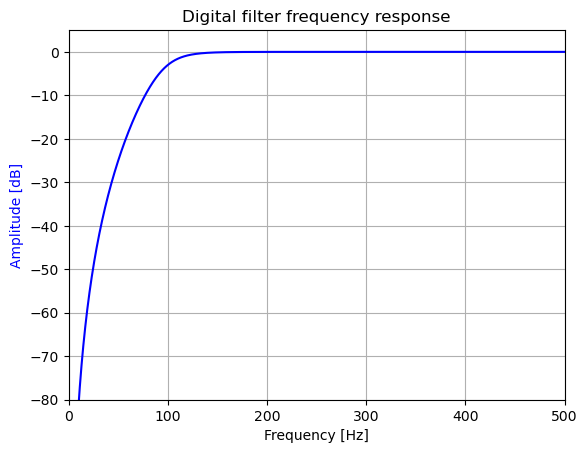

In [36]:
import numpy as np
from scipy.signal import butter, freqz, filtfilt
import matplotlib.pyplot as plt

# Filter specifications
fs = 1000 # Sample rate, Hz
cutoff = 100 # Cutoff frequency, Hz
order = 4 # Filter order

# Compute the filter coefficients using the Butterworth filter design function
b, a = butter(order, cutoff/(0.5*fs), btype='high')

# Compute the frequency response of the filter
w, h = freqz(b, a, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-80, 5])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


# **Band-pass Butterworth IIR filter**

In this example, we specify the filter type as '**bandpass**' using the btype argument of the butter function, and we provide the lower and upper cutoff frequencies as a list of `[f1/(0.5*fs), f2/(0.5*fs)]`. This creates a Butterworth band-pass filter with the specified cutoff frequencies and order. We then compute the frequency response of the filter and plot the response using the matplotlib library. 

Note that we also use the filtfilt function to apply the filter to a signal in order to remove phase distortion, as IIR filters can introduce phase shifts in the filtered signal.

C:\Users\vigne\AppData\Local\Temp\ipykernel_21600\3963263645.py:20: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')


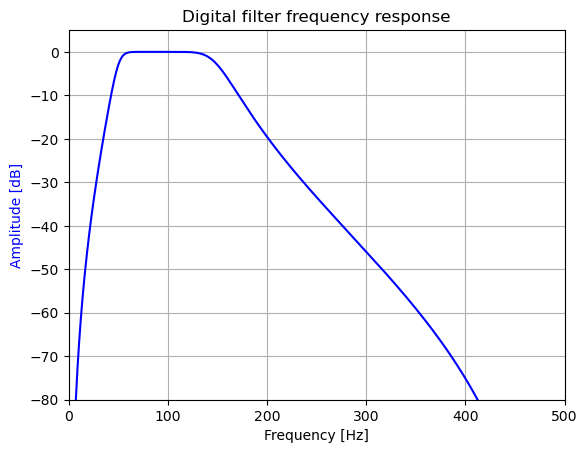

In [37]:
import numpy as np
from scipy.signal import butter, freqz, filtfilt
import matplotlib.pyplot as plt

# Filter specifications
fs = 1000 # Sample rate, Hz
f1 = 50 # Lower cutoff frequency, Hz
f2 = 150 # Upper cutoff frequency, Hz
order = 4 # Filter order

# Compute the filter coefficients using the Butterworth filter design function
b, a = butter(order, [f1/(0.5*fs), f2/(0.5*fs)], btype='bandpass')

# Compute the frequency response of the filter
w, h = freqz(b, a, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-80, 5])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


# **Band-stop Butterworth IIR filter**

In this example, we specify the filter type as '**bandstop**' using the btype argument of the butter function, and we provide the lower and upper stopband frequencies as a list of `[f1/(0.5*fs), f2/(0.5*fs)]`. This creates a Butterworth band-stop filter with the specified stopband frequencies and order. We then compute the frequency response of the filter and plot the response using the matplotlib library. 

Note that we also use the filtfilt function to apply the filter to a signal in order to remove phase distortion, as IIR filters can introduce phase shifts in the filtered signal.

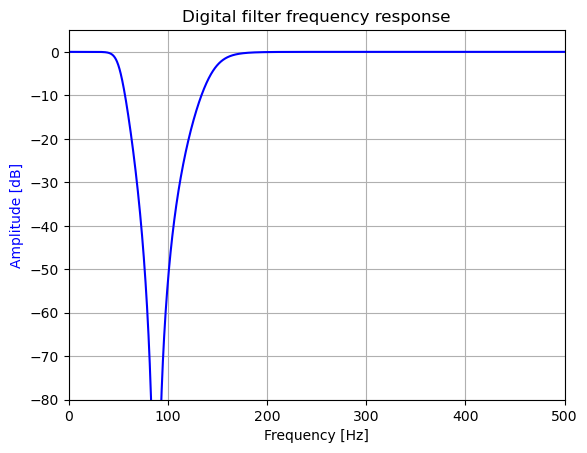

In [38]:
import numpy as np
from scipy.signal import butter, freqz, filtfilt
import matplotlib.pyplot as plt

# Filter specifications
fs = 1000 # Sample rate, Hz
f1 = 50 # Lower stopband frequency, Hz
f2 = 150 # Upper stopband frequency, Hz
order = 4 # Filter order

# Compute the filter coefficients using the Butterworth filter design function
b, a = butter(order, [f1/(0.5*fs), f2/(0.5*fs)], btype='bandstop')

# Compute the frequency response of the filter
w, h = freqz(b, a, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-80, 5])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# -------------------- Create a 5-tone test signal --------------------
fs = 1000  # Hz
duration = 2.0  # seconds
t = np.arange(0, duration, 1/fs)

freqs = np.array([30, 80, 135, 220, 350])     # 5 components
amps  = np.array([1.0, 0.8, 0.6, 0.5, 0.4])

x = np.zeros_like(t, dtype=float)
for a, f in zip(amps, freqs):
    x += a * np.sin(2*np.pi*f*t)

# small noise for realism (set to 0 to remove)
rng = np.random.default_rng(0)
x += 0.05 * rng.standard_normal(size=t.size)

# -------------------- FFT helper --------------------
def fft_mag(sig: np.ndarray, fs: float):
    n = sig.size
    w = np.hanning(n)
    X = np.fft.rfft(sig * w)
    f = np.fft.rfftfreq(n, d=1/fs)
    mag = (2.0 / np.sum(w)) * np.abs(X)  # amplitude-like scaling
    return f, mag

f_raw, mag_raw = fft_mag(x, fs)

# Zoom for time plots
t0, t1 = 0.0, 0.25
i0, i1 = int(t0*fs), int(t1*fs)

In [40]:
def plot_before_after(name: str, x_f: np.ndarray):
    f_flt, mag_flt = fft_mag(x_f, fs)

    # Time-domain overlay
    plt.figure(figsize=(11, 4), dpi=150)
    plt.plot(t[i0:i1], x[i0:i1], label="Raw")
    plt.plot(t[i0:i1], x_f[i0:i1], label="Filtered")
    plt.title(f"{name} — time domain (zoom)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True, alpha=0.25)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # FFT overlay
    plt.figure(figsize=(11, 4), dpi=150)
    plt.plot(f_raw, mag_raw, label="Raw")
    plt.plot(f_flt, mag_flt, label="Filtered")
    plt.title(f"{name} — FFT magnitude")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (a.u.)")
    plt.xlim(0, fs/2)
    plt.grid(True, alpha=0.25)
    plt.legend()
    plt.tight_layout()
    plt.show()


# ===============

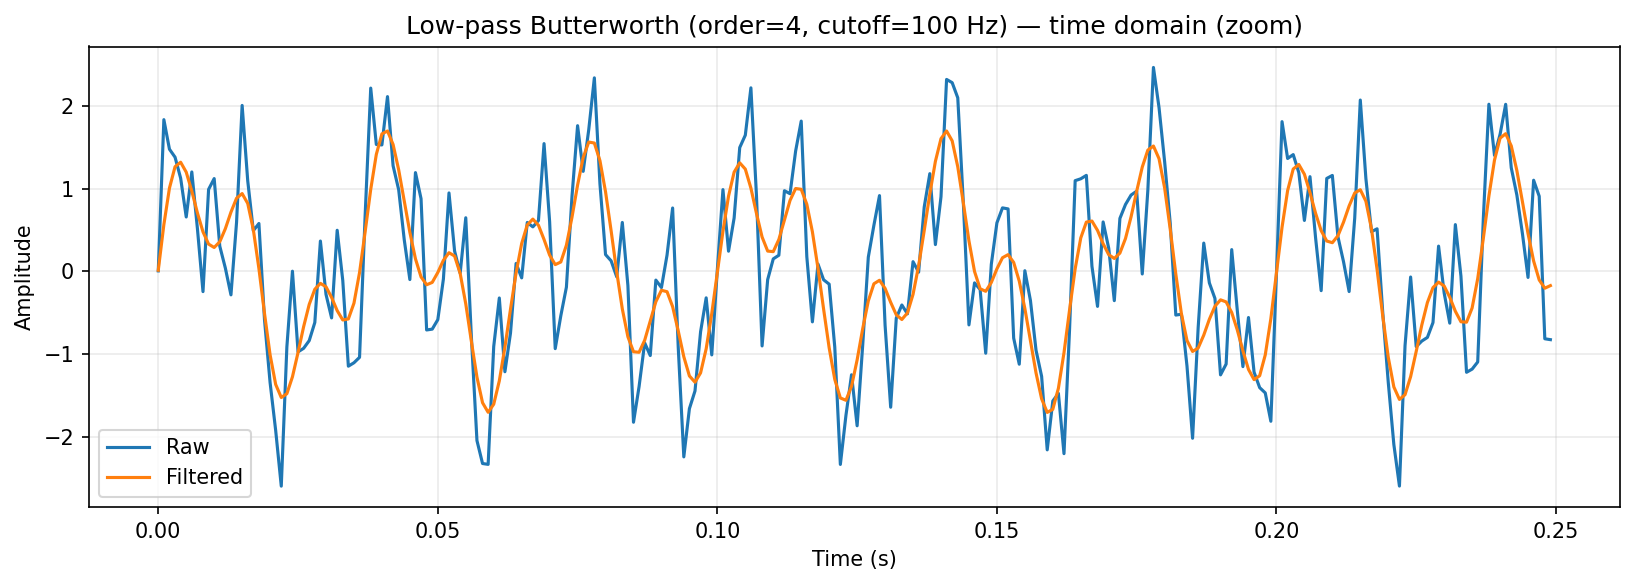

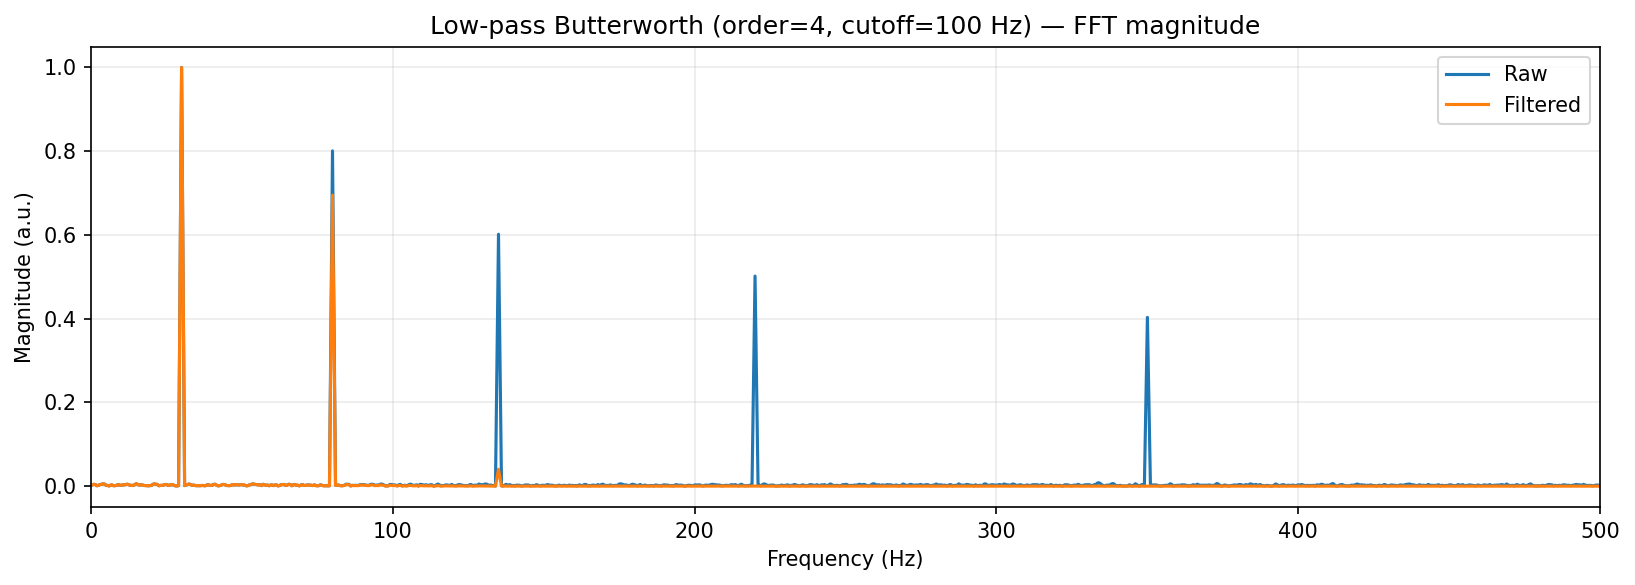

In [41]:
order = 4
cutoff = 100
wn = cutoff / (0.5 * fs)
b_lp, a_lp = butter(order, wn, btype="low")
x_lp = filtfilt(b_lp, a_lp, x)

plot_before_after(f"Low-pass Butterworth (order={order}, cutoff={cutoff} Hz)", x_lp)

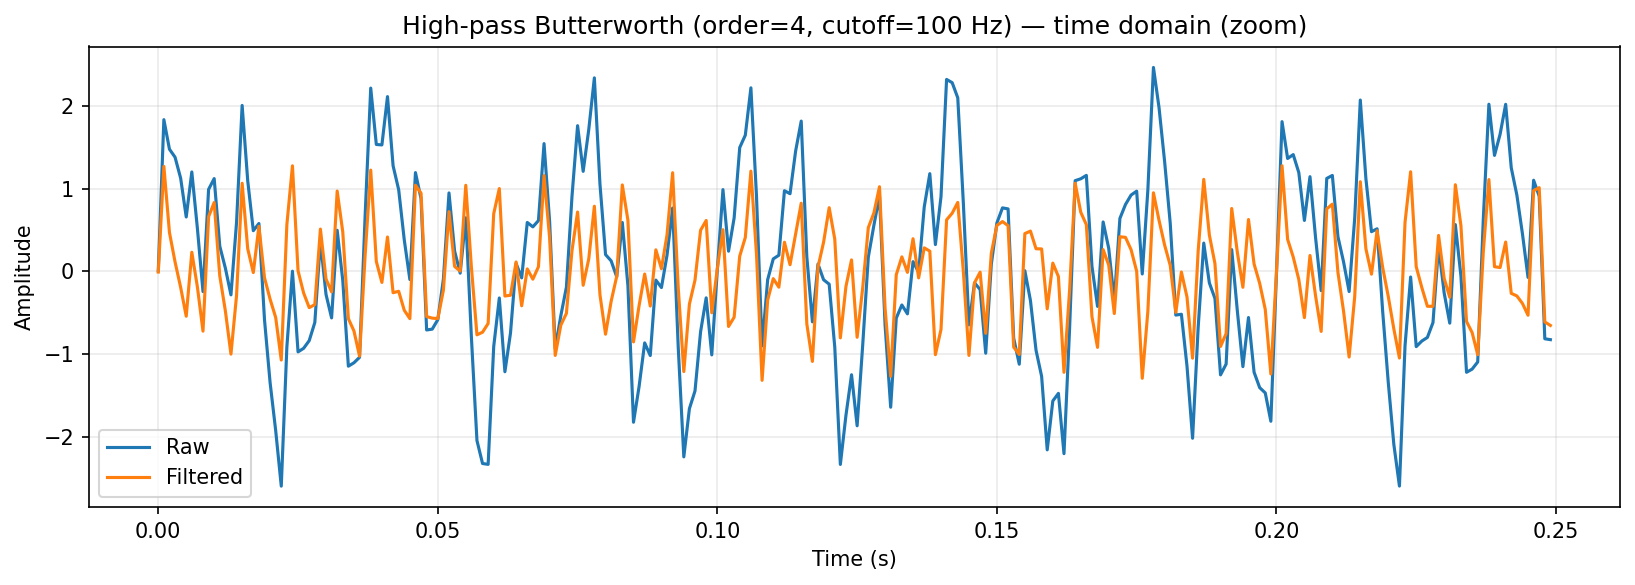

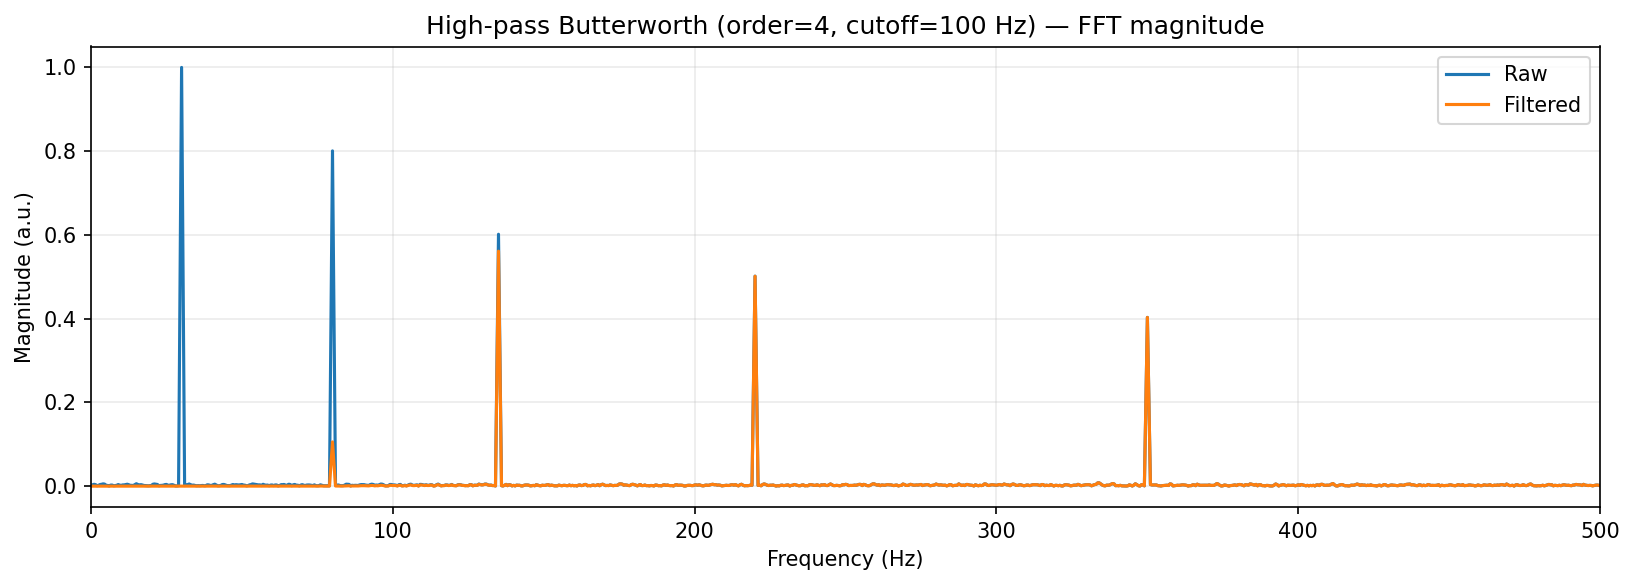

In [42]:
order = 4
cutoff = 100
wn = cutoff / (0.5 * fs)
b_hp, a_hp = butter(order, wn, btype="high")
x_hp = filtfilt(b_hp, a_hp, x)

plot_before_after(f"High-pass Butterworth (order={order}, cutoff={cutoff} Hz)", x_hp)

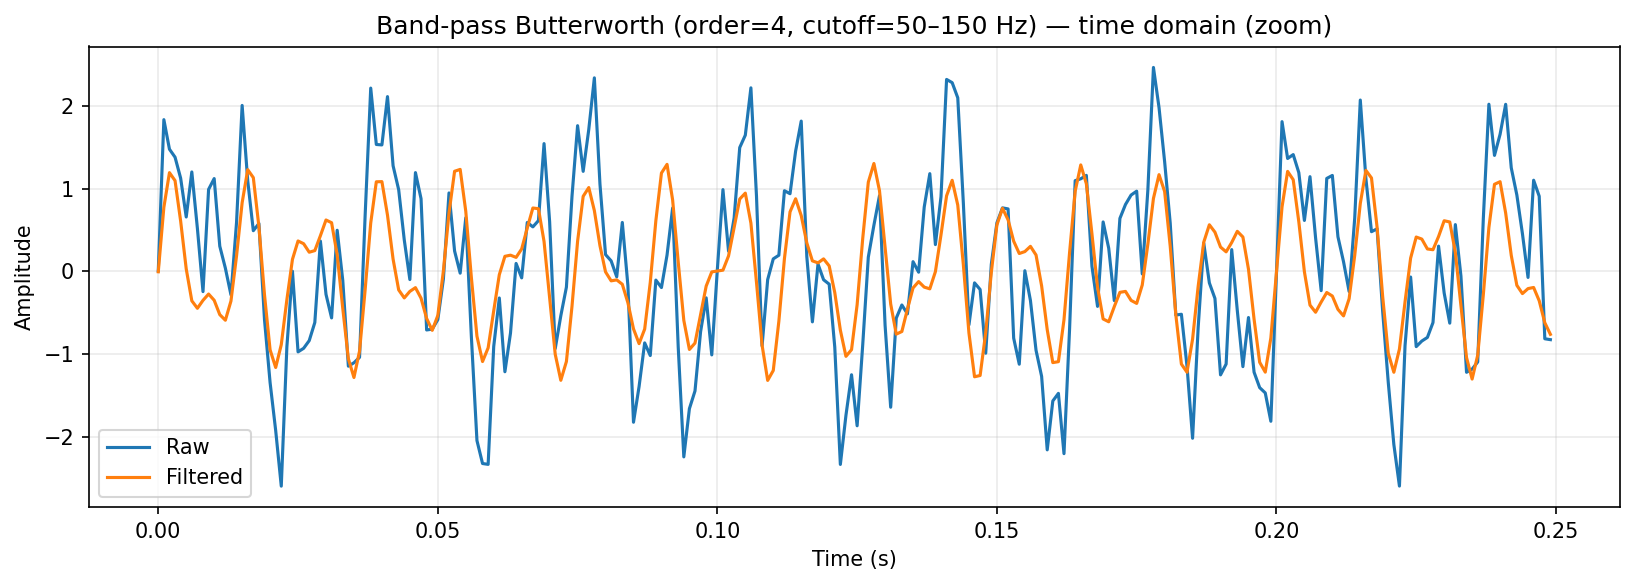

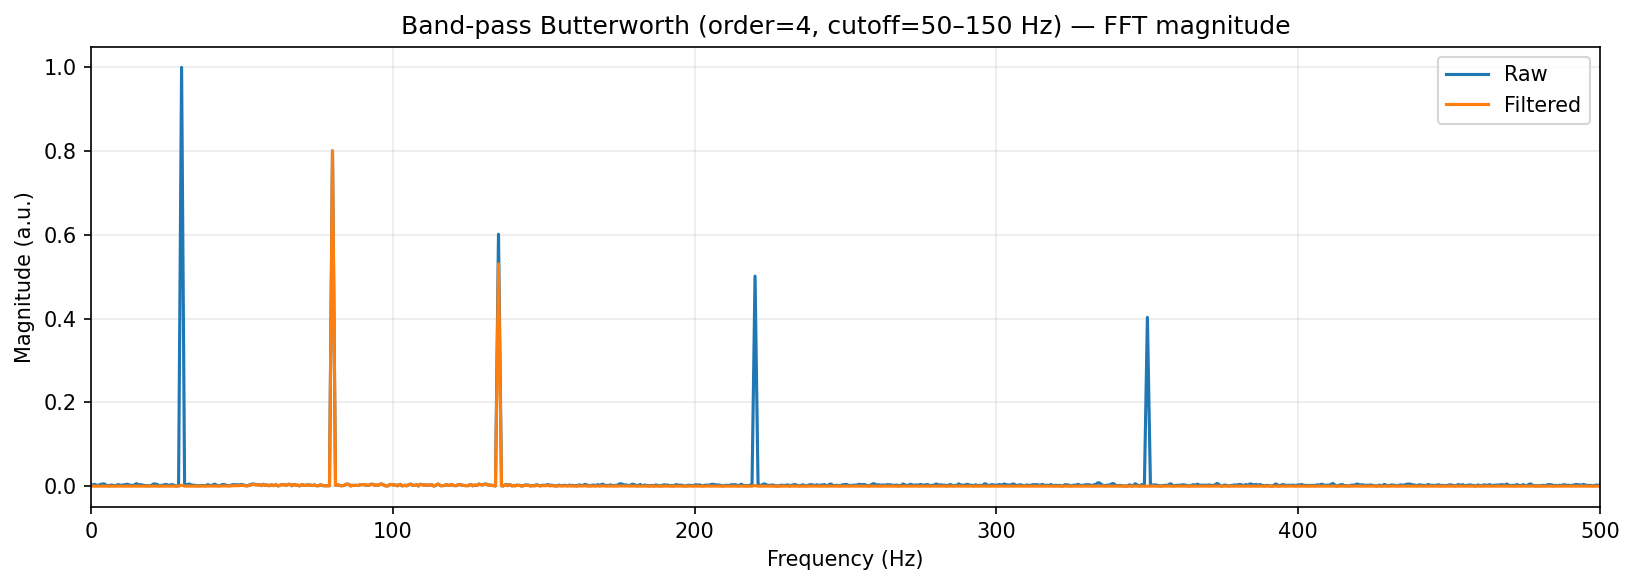

In [43]:
order = 4
f1, f2 = 50, 150
wn = [f1 / (0.5 * fs), f2 / (0.5 * fs)]
b_bp, a_bp = butter(order, wn, btype="band")
x_bp = filtfilt(b_bp, a_bp, x)

plot_before_after(f"Band-pass Butterworth (order={order}, cutoff={f1}–{f2} Hz)", x_bp)

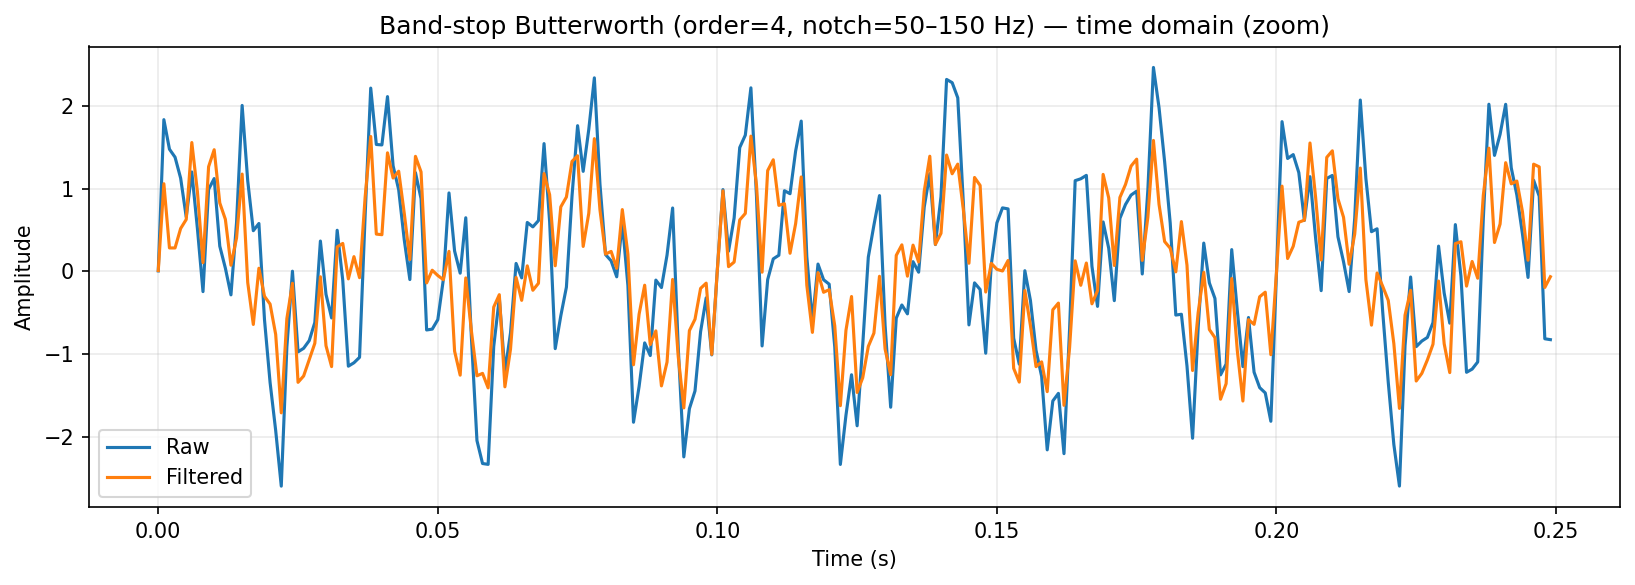

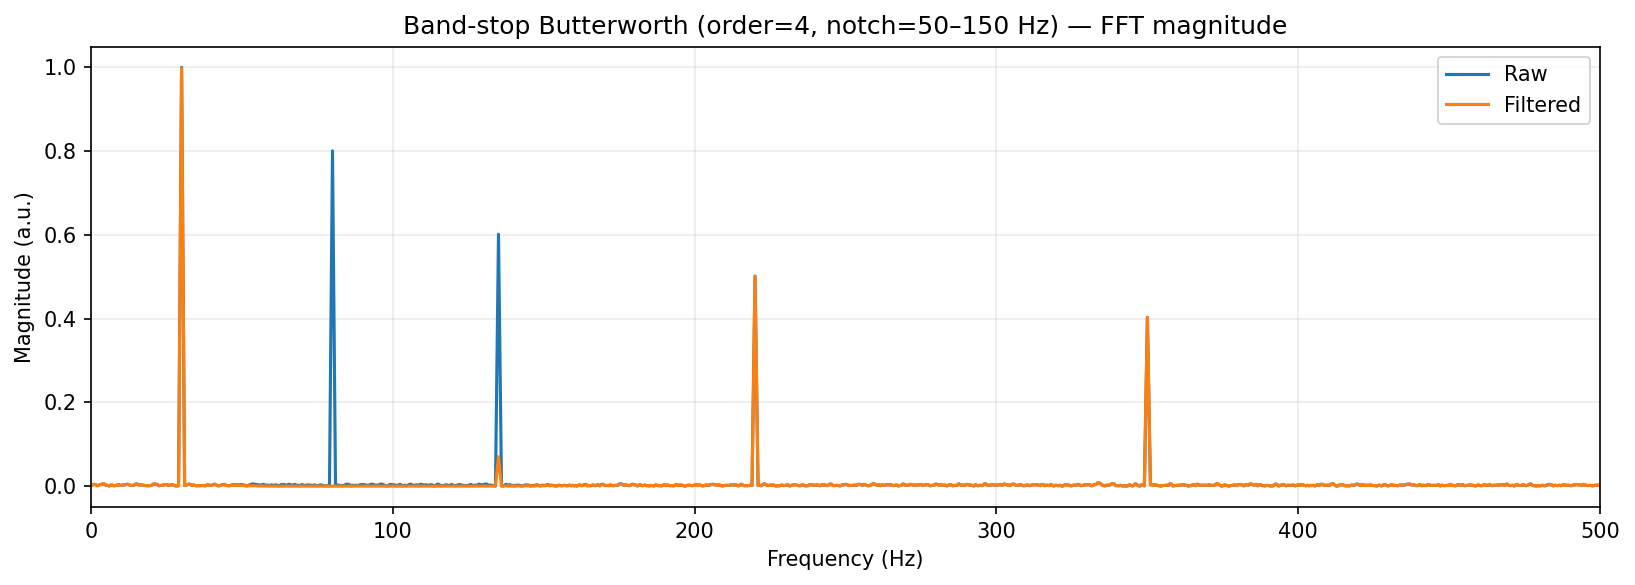

Signal components (Hz): [30, 80, 135, 220, 350]
Sampling rate (Hz): 1000


In [44]:
order = 4
f1, f2 = 50, 150
wn = [f1 / (0.5 * fs), f2 / (0.5 * fs)]
b_bs, a_bs = butter(order, wn, btype="bandstop")
x_bs = filtfilt(b_bs, a_bs, x)

plot_before_after(f"Band-stop Butterworth (order={order}, notch={f1}–{f2} Hz)", x_bs)


print("Signal components (Hz):", freqs.tolist())
print("Sampling rate (Hz):", fs)